In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Helper: Add motion blur

def motion_blur(image, size=15):
    kernel = np.zeros((size, size))
    kernel[int((size - 1)/2), :] = np.ones(size)
    kernel /= size
    return cv2.filter2D(image, -1, kernel), kernel


In [8]:
# Inverse Filtering Function

def inverse_filtering(degraded, H):
    # DFT of degraded image
    G = np.fft.fft2(degraded)
    H_f = np.fft.fft2(H, s=degraded.shape)

    # Avoid divide by zero (add epsilon)
    epsilon = 1e-6
    F_hat = G / (H_f + epsilon)

    # Inverse DFT to get restored image
    f_restored = np.fft.ifft2(F_hat)
    f_restored = np.abs(f_restored)
    return np.uint8(np.clip(f_restored, 0, 255))


In [10]:
# Main Program

# Load grayscale image
img = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))

# Apply motion blur (degradation)
degraded, kernel = motion_blur(img, size=15)

# Restore using inverse filtering
restored = inverse_filtering(degraded, kernel)


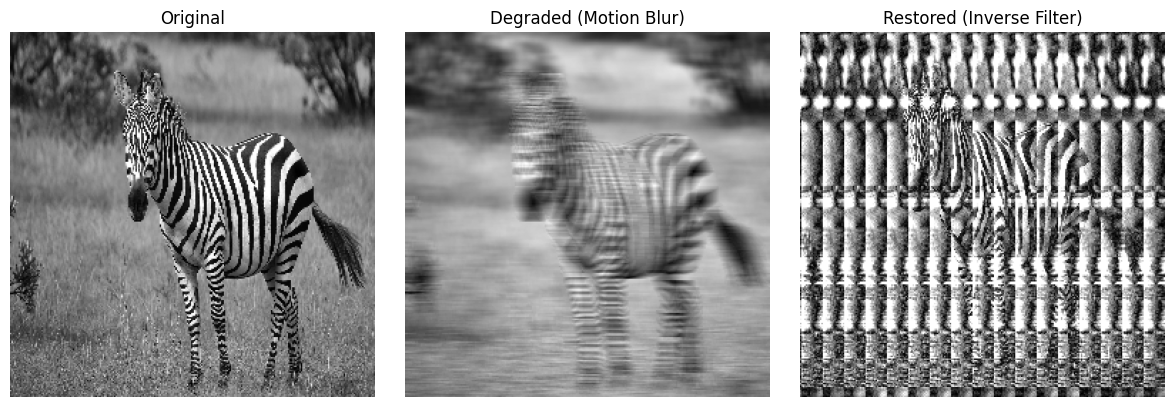

In [11]:

# Display Results

titles = ["Original", "Degraded (Motion Blur)", "Restored (Inverse Filter)"]
images = [img, degraded, restored]

plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()
